In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parents[1]
sys.path.append(str(PROJECT_ROOT))


In [2]:
from src.pipelines.extracao_ocorrencias import extract_ocorrencias
from src.pipelines.transformacao_ocorrencias import transform_ocorrencias

df = extract_ocorrencias()
df = transform_ocorrencias(df)
df.head()

,id,naturezaOcorrenciaId,grupoOcorrenciaId,subgrupoOcorrenciaId,unidadeOperacionalId,hora,dia_semana,mes,ano,fim_de_semana,atendida,turno,municipio_freq
0,1,1,1,1,3,0,2,1,2025,0,1,madrugada,0.150713
1,2,1,2,2,3,1,2,1,2025,0,1,madrugada,0.150713
2,3,1,3,37,3,0,2,1,2025,0,1,madrugada,0.150713
3,4,1,2,24,6,11,2,1,2025,0,1,manha,0.432500
4,5,1,4,5,2,3,4,1,2025,0,0,madrugada,0.432500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12474 entries, 0 to 12473
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12474 non-null  int64  
 1   naturezaOcorrenciaId  12474 non-null  int64  
 2   grupoOcorrenciaId     12474 non-null  int64  
 3   subgrupoOcorrenciaId  12474 non-null  int64  
 4   unidadeOperacionalId  12474 non-null  int64  
 5   hora                  12474 non-null  int32  
 6   dia_semana            12474 non-null  int32  
 7   mes                   12474 non-null  int32  
 8   ano                   12474 non-null  int32  
 9   fim_de_semana         12474 non-null  int64  
 10  atendida              12474 non-null  int64  
 11  turno                 12474 non-null  object 
 12  municipio_freq        12474 non-null  float64
dtypes: float64(1), int32(4), int64(7), object(1)
memory usage: 1.0+ MB


# Dado o contexto da ocorrência, qual o turno do dia em que ela acontece?

In [5]:
X = df.drop("turno", axis=1)
y = df["turno"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   madrugada       1.00      1.00      1.00       162
       manha       1.00      1.00      1.00       837
       noite       1.00      1.00      1.00       488
       tarde       1.00      1.00      1.00      1008

    accuracy                           1.00      2495
   macro avg       1.00      1.00      1.00      2495
weighted avg       1.00      1.00      1.00      2495



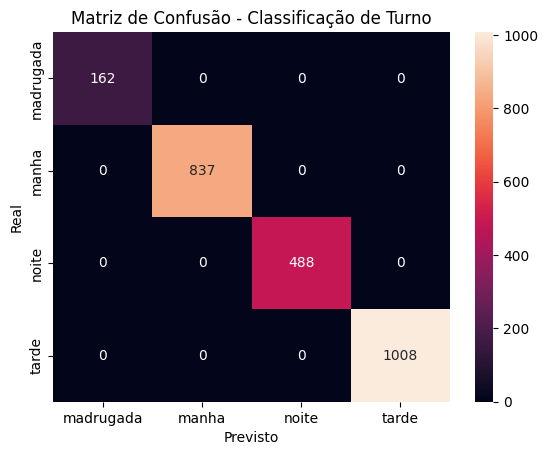

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Classificação de Turno")
plt.show()


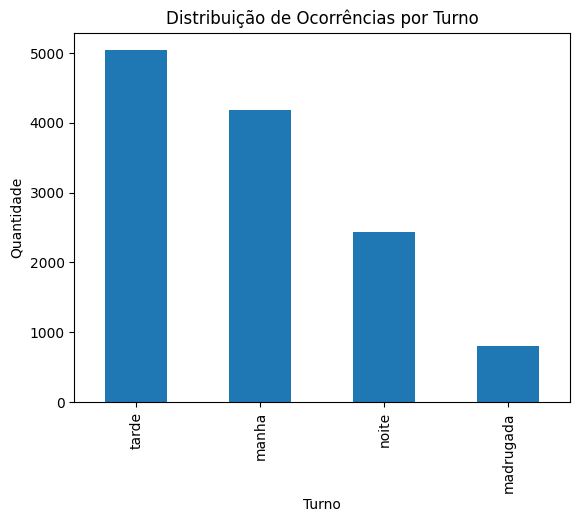

In [11]:
df["turno"].value_counts().plot(kind="bar")
plt.title("Distribuição de Ocorrências por Turno")
plt.xlabel("Turno")
plt.ylabel("Quantidade")
plt.show()
